In [584]:
import xarray as xr

In [590]:
ds = xr.open_dataset("../data/lagrangian_particles.nc")
nanosec_per_sec = 1e9
ds["time_in_seconds"] = ds.time.astype("float") / nanosec_per_sec
ds = ds.assign_coords(
    {
        "time_in_seconds":
        xr.DataArray(ds.time.astype("float")/nanosec_per_sec, dims=("time",))
    }
)

# Calculate the standard deviation of z at each time
ds['z_std'] = ds['z'].std(dim='particle_id')


In [592]:
ds

<xarray.Dataset> Size: 810kB
Dimensions:          (particle_id: 100, time: 334)
Coordinates:
  * particle_id      (particle_id) float64 800B 1.0 2.0 3.0 ... 98.0 99.0 100.0
  * time             (time) timedelta64[ns] 3kB 00:00:00 ... 00:02:46.500000
    time_in_seconds  (time) float64 3kB 0.0 0.5 1.0 1.5 ... 165.5 166.0 166.5
Data variables:
    x                (time, particle_id) float64 267kB ...
    y                (time, particle_id) float64 267kB ...
    z                (time, particle_id) float64 267kB 0.0 0.0 ... -0.3974
    z_std            (time) float64 3kB 0.0 2.965e-05 ... 0.4538 0.4462
Attributes:
    interval:              0.5
    Oceananigans:          This file was generated using Oceananigans v0.91.0
    Julia:                 This file was generated using Julia Version 1.10.2...
    output time interval:  Output was saved every 500 ms.
    date:                  This file was generated on 2024-06-05T09:45:26.624.
    schedule:              TimeInterval

### Calculation of turbulent diffusivity

(When you create a cell, you can click in the margin to select the code cell and press the `m` key to turn it into a Markdown (text) cell)

In [653]:
import numpy as np
time_s = ds['time_in_seconds'].values  # Get time values in np array
z_var = ds['z_std'].values ** 2
var_fit = np.polynomial.Polynomial.fit(time_s, z_var, 1) #get 1st order polynomial fit
var_coefs = var_fit.convert().coef
var_slope = var_coefs[1]
k = var_slope / 2 #vertical turbulent diffusivity in m/s
print(f"The turbulent vertical diffusivity of this simulation is {np.round(k,5)} meters squared per second")

The turbulent vertical diffusivity of this simulation is 0.00082 meters squared per second


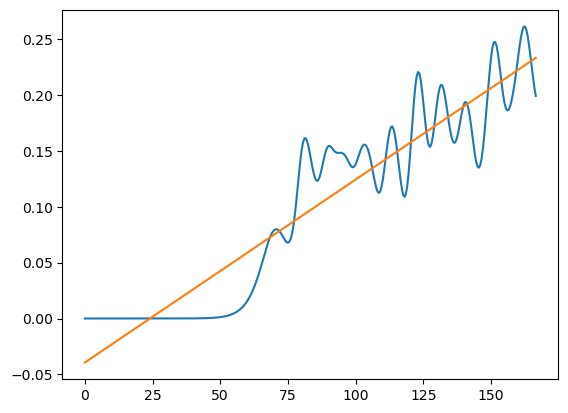

In [661]:
plt.plot(time_s, z_var)
plt.plot(time_s, var_fit(time_s))

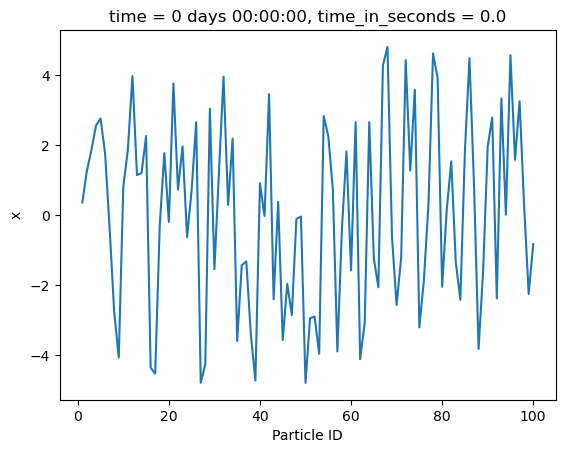

In [531]:
ds.x.isel(time=0).plot()

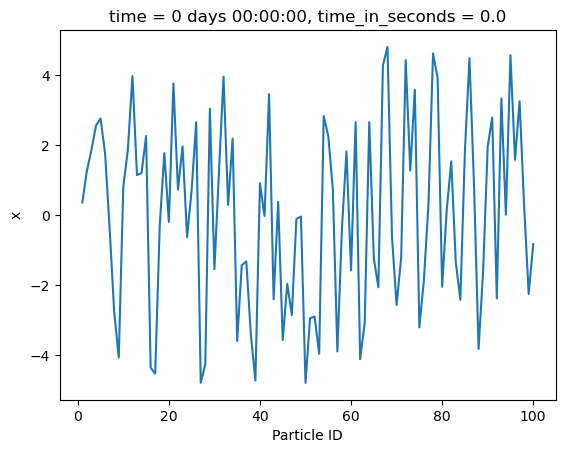

In [533]:
extend_x(ds).x.isel(time=0).plot()

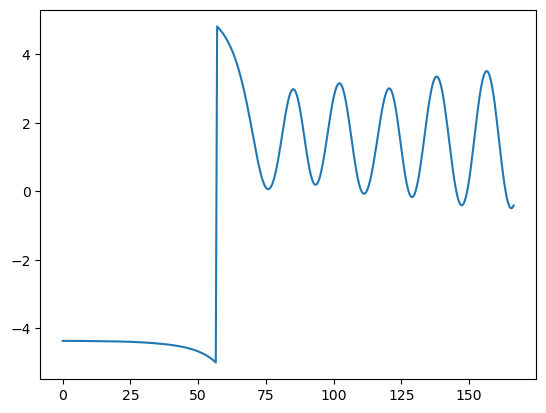

In [447]:
plt.plot(ds.time_in_seconds.values, ds.x.isel(particle_id=15).values)

In [223]:
ds.x.values[1,0] = 1.

In [225]:
ds.x.values

array([[ 1.        ,  1.2624198 ,  1.86292979, ...,  0.27371022,
        -2.25498133, -0.82713937],
       [ 1.        ,  1.26242964,  1.86289631, ...,  0.27367565,
        -2.25501759, -0.82717349],
       [ 0.36141936,  1.26243247,  1.86287205, ...,  0.27362032,
        -2.25506317, -0.82721326],
       ...,
       [ 1.05750315,  1.37890069,  1.64311373, ...,  1.03393031,
         3.46713781,  1.08649806],
       [ 1.00298445,  1.36524726,  1.64991845, ...,  0.97438972,
         3.59082317,  0.90629396],
       [ 0.96579502,  1.35763524,  1.65238536, ...,  0.93309673,
         3.65886226,  0.74489877]])

In [179]:
print(ds.x.sel(particle_id=18).max())

<xarray.DataArray 'x' ()> Size: 8B
array(2.37130237)
Coordinates:
    particle_id  float64 8B 18.0


In [231]:
for i, particle_id in enumerate(ds["particle_id"].values):
    print(i, particle_id)

0 1.0
1 2.0
2 3.0
3 4.0
4 5.0
5 6.0
6 7.0
7 8.0
8 9.0
9 10.0
10 11.0
11 12.0
12 13.0
13 14.0
14 15.0
15 16.0
16 17.0
17 18.0
18 19.0
19 20.0
20 21.0
21 22.0
22 23.0
23 24.0
24 25.0
25 26.0
26 27.0
27 28.0
28 29.0
29 30.0
30 31.0
31 32.0
32 33.0
33 34.0
34 35.0
35 36.0
36 37.0
37 38.0
38 39.0
39 40.0
40 41.0
41 42.0
42 43.0
43 44.0
44 45.0
45 46.0
46 47.0
47 48.0
48 49.0
49 50.0
50 51.0
51 52.0
52 53.0
53 54.0
54 55.0
55 56.0
56 57.0
57 58.0
58 59.0
59 60.0
60 61.0
61 62.0
62 63.0
63 64.0
64 65.0
65 66.0
66 67.0
67 68.0
68 69.0
69 70.0
70 71.0
71 72.0
72 73.0
73 74.0
74 75.0
75 76.0
76 77.0
77 78.0
78 79.0
79 80.0
80 81.0
81 82.0
82 83.0
83 84.0
84 85.0
85 86.0
86 87.0
87 88.0
88 89.0
89 90.0
90 91.0
91 92.0
92 93.0
93 94.0
94 95.0
95 96.0
96 97.0
97 98.0
98 99.0
99 100.0


In [ ]:
for i, time_in_sec in enumerate(ds["time_in_seconds"].values):
    print(i, time_in_sec)

for i in range(0, len(ds["time_in_seconds"].values)):
    time_in_sec = ds["time_in_seconds"].values[i]
    print(i, time_in_sec)

In [563]:

def extend_x(ds):
    """
    Extends the x values of particles once they reach 5 for the purposes of plotting.
        """
    #create copy of ds to not mess it up
    ds_c = ds.copy()
    x_original = ds.x.copy().values
    nt = len(ds_c.time_in_seconds)
    # Loop over all particle_ids
    for i,p in enumerate(ds_c['particle_id'].values):
        for j,t in enumerate(ds_c.time_in_seconds.values[1:], start=1):
            x_cur = x_original[j,i]
            x_prev = x_original[j-1,i]
            diff = x_cur - x_prev
            if diff > 5:
               ds_c.x.values[j:nt,i] = ds_c.x.values[j:nt,i] - 10
            elif diff < -5:
                ds_c.x.values[j:nt,i] = ds_c.x.values[j:nt,i] + 10

    return ds_c #return copy dataset with shifted x values for plotting

In [565]:
ds_extended = extend_x(ds)

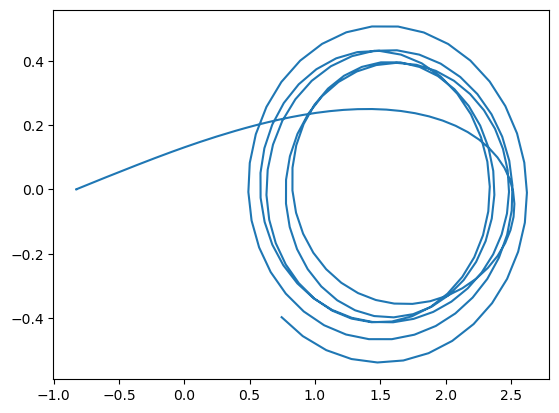

In [477]:
particle = ds_extended.isel(particle_id=99)
plt.plot(
    particle.x,
    particle.z
)

In [365]:
ds.x.isel(particle_id=[0], time=[0]).values[0,0] = 1.

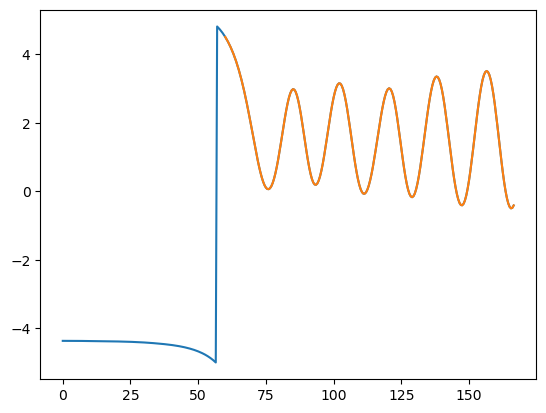

In [433]:
plt.plot(ds.time_in_seconds.values[:], ds.x.values[:,15])
j = 120
plt.plot(ds.time_in_seconds.values[j:len(ds.time_in_seconds)], ds.x.values[j:len(ds.time_in_seconds),15])

In [329]:
def extend_x_test(ds):
    """
    Extends the x values of particles once they reach 5 for the purposes of plotting.
        """
    ds_c = ds.copy()
    for i in range(len(ds_c['particle_id'].values)):
        for j in range(1, len(ds_c.time_in_seconds.values)):
            x_cur = ds_c.x.isel(time=j, particle_id=i).values
            x_prev = ds_c.x.isel(time=j-1, particle_id=i).values

            diff = x_cur - x_prev

            if diff > 5:
                ds_c['x'].isel(time=[j], particle_id=[i]).values[0,0] = x_cur - 10
            elif diff < -5:
                ds_c['x'].isel(time =[j], particle_id=[i]).values[0,0] = x_cur + 10

    return ds_c

In [185]:
x_example = ds.x.isel(particle_id=15).values

In [ ]:
for i in range(1, len(x_example)):
    dif = x_example[i]-x_example[i-1]
    print(dif)
    if dif > 5: 
        i_jump = i

In [189]:
i_jump

114

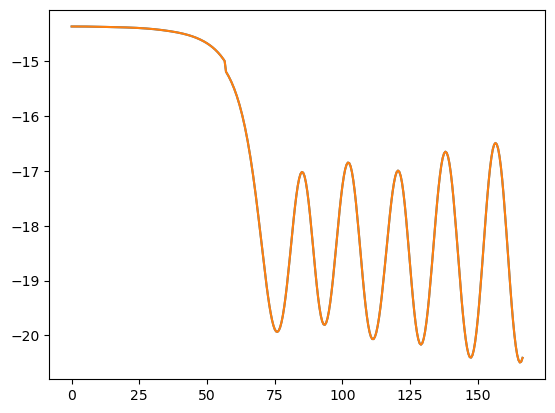

In [441]:
ds_extended = extend_x(ds)
plt.plot(ds.time_in_seconds.values, ds.x.isel(particle_id=15).values)
plt.plot(ds_extended.time_in_seconds.values, ds_extended.x.isel(particle_id=15).values)

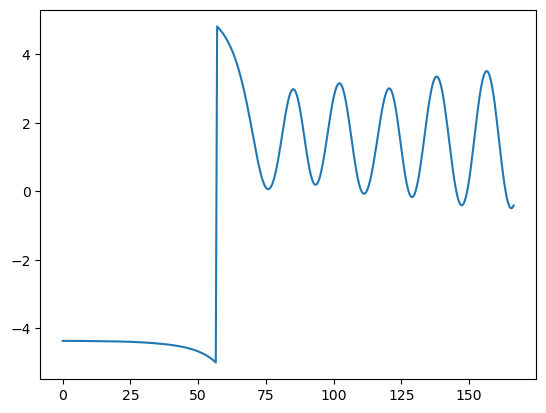

In [331]:
ds_extended = extend_x_test(ds)
plt.plot(ds_extended.time_in_seconds.values, ds_extended.x.isel(particle_id=15).values)

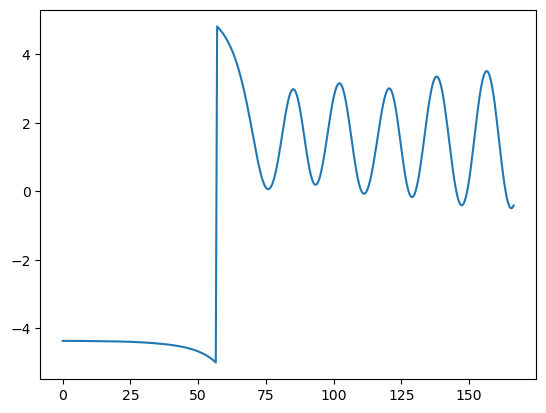

In [191]:
plt.plot(ds.time_in_seconds.values, x_example)


In [193]:
x_example_shifted = np.copy(x_example)
x_example_shifted[i_jump:] = x_example_shifted[i_jump:] - 10

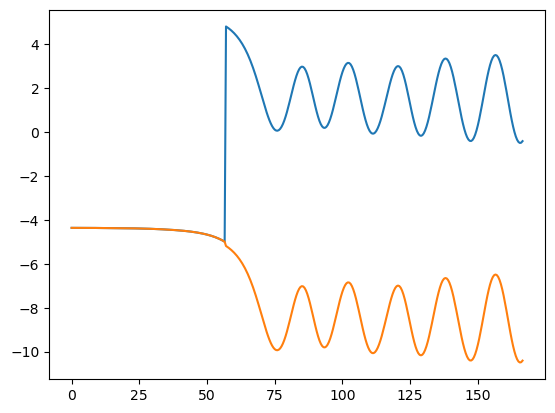

In [195]:
plt.plot(ds.time_in_seconds.values, x_example)
plt.plot(ds.time_in_seconds.values, x_example_shifted)

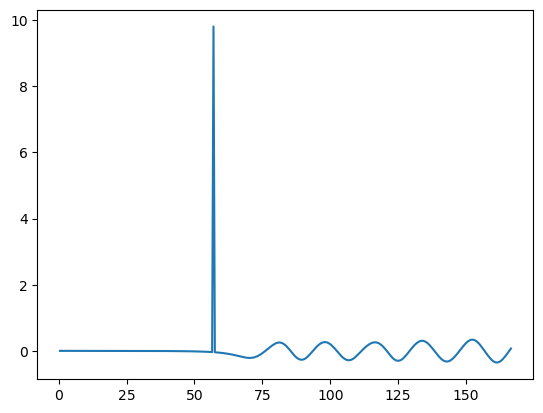

In [151]:
plt.plot(ds.time_in_seconds.values[1:], np.diff(x_example))

In [137]:
len(np.diff(x_example))

333

In [133]:
ds.time_in_seconds

<xarray.DataArray 'time_in_seconds' (time: 334)> Size: 3kB
array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,
        31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,
        36. ,  36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,
        40.5,  41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,
        45. ,  45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,
        49.5,  50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,
        54. ,  54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,
        58.5,  59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,
        63. ,  63.5,  64. ,  64.5,  65. ,  65.5,  66. ,  66.5,  67. ,
        67.5,  68. ,  68.5,  69. ,  69.5,  70. ,  70.5,  71. ,  71.5,
        72. ,  72.5,  73. ,  73.5,  74. ,  74.5,  75. ,  75.5,  76. ,
        76.5,  77. ,  77.5,  78. ,  78.5,  79. ,  79.5,  80. ,  80.5,
        81. ,  81.5,  82. ,  82.5,  83. ,  83.5,  84. ,  84.5,  85. ,
        85.5,  86. ,  86.5,  87. ,  87.5,  88. ,  88.5,  89. ,  89.5,
        90. ,  90.5,  91. ,  91.5,  92. ,  92.5,  93. ,  93.5,  94. ,
        94.5,  95. ,  95.5,  96. ,  96.5,  97. ,  97.5,  98. ,  98.5,
        99. ,  99.5, 100. , 100.5, 101. , 101.5, 102. , 102.5, 103. ,
       103.5, 104. , 104.5, 105. , 105.5, 106. , 106.5, 107. , 107.5,
       108. , 108.5, 109. , 109.5, 110. , 110.5, 111. , 111.5, 112. ,
       112.5, 113. , 113.5, 114. , 114.5, 115. , 115.5, 116. , 116.5,
       117. , 117.5, 118. , 118.5, 119. , 119.5, 120. , 120.5, 121. ,
       121.5, 122. , 122.5, 123. , 123.5, 124. , 124.5, 125. , 125.5,
       126. , 126.5, 127. , 127.5, 128. , 128.5, 129. , 129.5, 130. ,
       130.5, 131. , 131.5, 132. , 132.5, 133. , 133.5, 134. , 134.5,
       135. , 135.5, 136. , 136.5, 137. , 137.5, 138. , 138.5, 139. ,
       139.5, 140. , 140.5, 141. , 141.5, 142. , 142.5, 143. , 143.5,
       144. , 144.5, 145. , 145.5, 146. , 146.5, 147. , 147.5, 148. ,
       148.5, 149. , 149.5, 150. , 150.5, 151. , 151.5, 152. , 152.5,
       153. , 153.5, 154. , 154.5, 155. , 155.5, 156. , 156.5, 157. ,
       157.5, 158. , 158.5, 159. , 159.5, 160. , 160.5, 161. , 161.5,
       162. , 162.5, 163. , 163.5, 164. , 164.5, 165. , 165.5, 166. ,
       166.5])
Coordinates:
  * time     (time) timedelta64[ns] 3kB 00:00:00 ... 00:02:46.500000

In [45]:
import matplotlib.pyplot as plt

In [479]:
ds_extended.x

<xarray.DataArray 'x' (time: 334, particle_id: 100)> Size: 267kB
array([[ 0.361479,  1.26242 ,  1.86293 , ...,  0.27371 ,  7.745019, -0.827139],
       [ 0.361451,  1.26243 ,  1.862896, ...,  0.273676,  7.744982, -0.827173],
       [ 0.361419,  1.262432,  1.862872, ...,  0.27362 ,  7.744937, -0.827213],
       ...,
       [ 1.057503,  1.378901,  1.643114, ...,  1.03393 , 13.467138,  1.086498],
       [ 1.002984,  1.365247,  1.649918, ...,  0.97439 , 13.590823,  0.906294],
       [ 0.965795,  1.357635,  1.652385, ...,  0.933097, 13.658862,  0.744899]])
Coordinates:
  * particle_id      (particle_id) float64 800B 1.0 2.0 3.0 ... 98.0 99.0 100.0
  * time             (time) timedelta64[ns] 3kB 00:00:00 ... 00:02:46.500000
    time_in_seconds  (time) float64 3kB 0.0 0.5 1.0 1.5 ... 165.5 166.0 166.5

In [545]:
ds_extended.x.max("time").idxmax("particle_id")

<xarray.DataArray 'particle_id' ()> Size: 8B
array(38.)

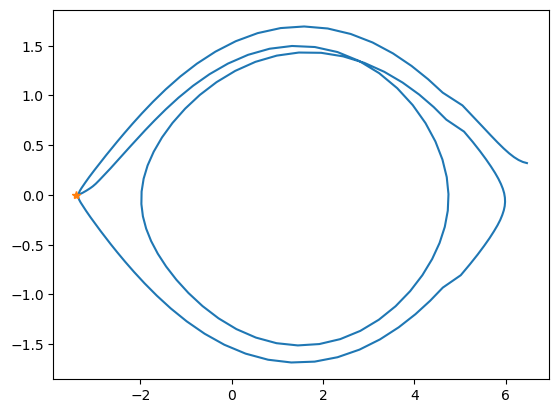

In [557]:
plt.plot(
    ds_extended.x.sel(particle_id=38.),
    ds_extended.z.sel(particle_id=38.),
)
plt.plot(
    ds_extended.x.sel(particle_id=38.).isel(time=0),
    ds_extended.z.sel(particle_id=38.).isel(time=0),
    marker="*"
)

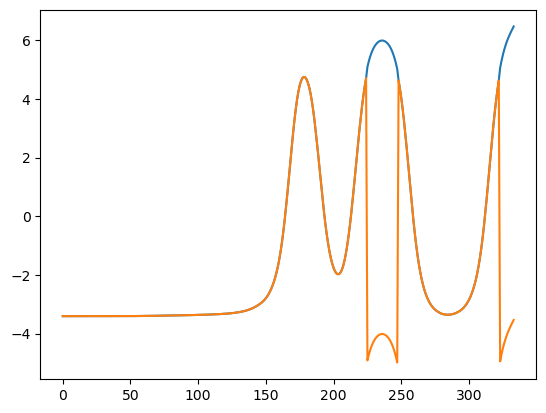

In [553]:
plt.plot(ds_extended.x.sel(particle_id=38.))
plt.plot(ds.x.sel(particle_id=38.))

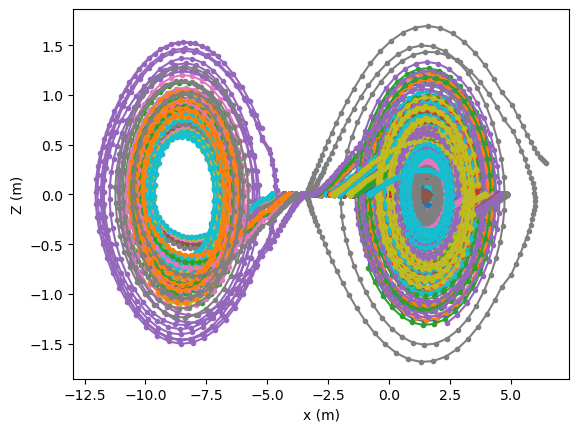

In [581]:
for i,p in enumerate(ds_extended.particle_id):
    plt.plot(
        ds_extended.x.sel(particle_id=p),
        ds_extended.z.sel(particle_id=p),
        ".-"
    );
plt.xlabel("x (m)")
plt.ylabel("Z (m)")
plt.savefig("/Users/rohanvaswani/code/Research Figs/spagetthiextend.png")
#plt.axvline(-5)
#plt.axvline(5)
#plt.xlim(-5, 5)
#FIX: As particle leaves to the right, add length to have particle trajectory be realistic.

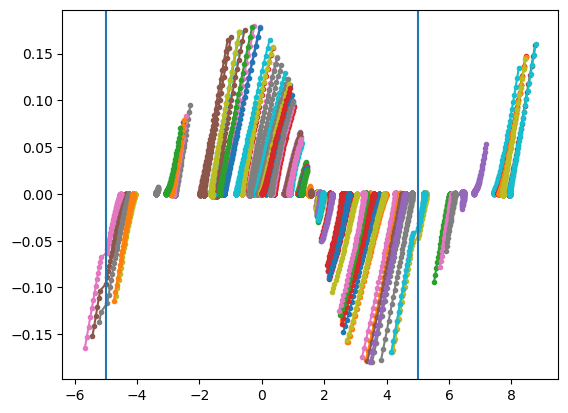

In [517]:
for i,p in enumerate(ds_extended.particle_id):
    plt.plot(
        ds_extended.x.sel(particle_id=p).isel(time=slice(0,120)),
        ds_extended.z.sel(particle_id=p).isel(time=slice(0,120)),
        marker=".",
        linestyle="-",
    );
plt.axvline(-5)
plt.axvline(5)

In [493]:
.isel(time=slice(0,50))

SyntaxError: invalid syntax (512497695.py, line 1)

In [483]:
ds_extended.x.sel(particle_id=p)

<xarray.DataArray 'x' (time: 334)> Size: 3kB
array([-0.827139, -0.827173, -0.827213, ...,  1.086498,  0.906294,  0.744899])
Coordinates:
    particle_id      float64 8B 100.0
  * time             (time) timedelta64[ns] 3kB 00:00:00 ... 00:02:46.500000
    time_in_seconds  (time) float64 3kB 0.0 0.5 1.0 1.5 ... 165.5 166.0 166.5

In [49]:
plt.plot(test_extend.x, test_extend.z);
#FIX: As particle leaves to the right, add length to have particle trajectory be realistic.

AttributeError: 'DataArray' object has no attribute 'x'

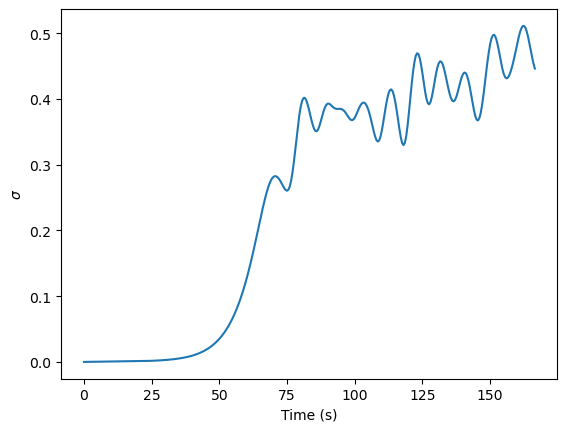

In [579]:
plt.plot(ds.time_in_seconds, ds.z.std("particle_id"))
plt.xlabel("Time (s)")
plt.ylabel(r"$\sigma$")
plt.savefig("/Users/rohanvaswani/code/Research Figs/stdplot.png")

In [ ]:
def particle_stats(arr)



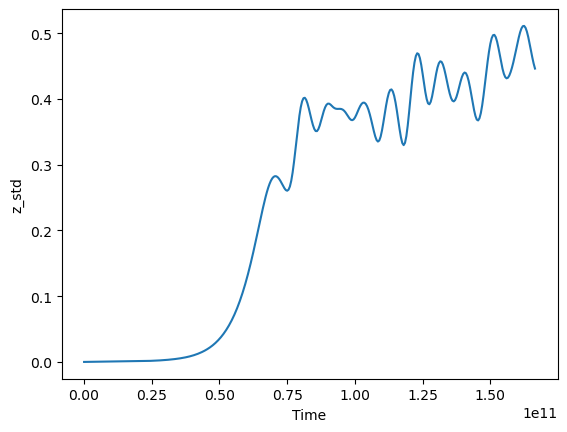

In [598]:
ds.z_std.plot()

In [632]:
import numpy as np
time_s = ds['time_in_seconds'].values  # Get time values in np array
z_std = ds['z_std'].values 
std_fit = np.polynomial.Polynomial.fit(time_s, z_std, 1) #get 1st order polynomial fit
std_coefs = std_fit.convert().coef
std_slope = std_coefs[1]
k = std_slope / 2 #vertical turbulent diffusivity in m/s
print(f"The turbulent vertical diffusivity of this simulation is {np.round(k,5)} meters per second")

The turbulent vertical diffusivity of this simulation is 0.00181 meters per second


In [608]:
help(np.polynomial.Polynomial.fit)
type(ds.time.values[1])

Help on method fit in module numpy.polynomial._polybase:

fit(x, y, deg, domain=None, rcond=None, full=False, w=None, window=None, symbol='x') method of abc.ABCMeta instance
    Least squares fit to data.
    
    Return a series instance that is the least squares fit to the data
    `y` sampled at `x`. The domain of the returned instance can be
    specified and this will often result in a superior fit with less
    chance of ill conditioning.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,)
        y-coordinates of the M sample points ``(x[i], y[i])``.
    deg : int or 1-D array_like
        Degree(s) of the fitting polynomials. If `deg` is a single integer
        all terms up to and including the `deg`'th term are included in the
        fit. For NumPy versions >= 1.11.0 a list of integers specifying the
        degrees of the terms to include may be used instead.
    doma

numpy.timedelta64